Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:780: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


38/38 - 0s - 13ms/step - accuracy: 0.4870 - loss: 0.6795 - val_accuracy: 0.5853 - val_loss: 0.6494
Epoch 2/30
38/38 - 0s - 1ms/step - accuracy: 0.7038 - loss: 0.6272 - val_accuracy: 0.7692 - val_loss: 0.5749
Epoch 3/30
38/38 - 0s - 2ms/step - accuracy: 0.8059 - loss: 0.5471 - val_accuracy: 0.8428 - val_loss: 0.4860
Epoch 4/30
38/38 - 0s - 2ms/step - accuracy: 0.8418 - loss: 0.4638 - val_accuracy: 0.8662 - val_loss: 0.4099
Epoch 5/30
38/38 - 0s - 1ms/step - accuracy: 0.8661 - loss: 0.3980 - val_accuracy: 0.8863 - val_loss: 0.3603
Epoch 6/30
38/38 - 0s - 1ms/step - accuracy: 0.8887 - loss: 0.3443 - val_accuracy: 0.8963 - val_loss: 0.3035
Epoch 7/30
38/38 - 0s - 1ms/step - accuracy: 0.9021 - loss: 0.2941 - val_accuracy: 0.9164 - val_loss: 0.2618
Epoch 8/30
38/38 - 0s - 1ms/step - accuracy: 0.9146 - loss: 0.2565 - val_accuracy: 0.9331 - val_loss: 0.2218
Epoch 9/30
38/38 - 0s - 1ms/step - accuracy: 0.9314 - loss: 0.2230 - val_accuracy: 0.9431 - val_loss: 0.1971
Epoch 10/30
38/38 - 0s - 1ms/

Text(0, 0.5, 'Accuracy')

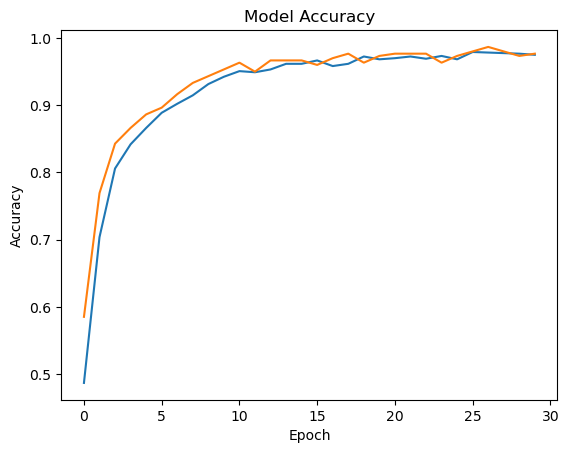

In [31]:
#importing libraries
import tensorflow as tf  # TensorFlow: a library for building and training machine learning models
import numpy as np 
import pandas as pd # Pandas: great for working with data tables (like spreadsheets)
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer  # Turns words into numbers for the model
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Makes all number lists the same length

##Importing the data and preprocessing it
data = pd.read_csv('/Users/sarveshdhumal/Desktop/Learning/Python/Jupiter/SPAM text message 20170820 - Data.csv')
ham_msg = data[data.Category == "ham"]
spam_msg = data[data.Category == "spam"]
ham_msg = ham_msg.sample(n = len(spam_msg), random_state=42)
balanced_data = pd.concat([ham_msg,spam_msg]).reset_index(drop=True)
balanced_data['label'] = balanced_data['Category'].map({'ham':0,'spam':1})

# Split the data into training (80%) and testing (20%) sets
# train_msg/test_msg are the messages, train_labels/test_labels are the 0s and 1s (ham/spam)
# test_size=0.2 means 20% for testing, random_state=434 ensures the split is the same each time
train_msg, test_msg, train_labels, test_labels = train_test_split(balanced_data['Message'],
                                                                  balanced_data['label'],
                                                                  test_size=0.2, random_state=434)

vocab_size = 500  # Only care about the 500 most common words
oov_tok = '<OOV>'  # Use this tag for words not in the top 500 ("out of vocabulary")
max_len = 50  # Make every message 50 "words" long (or numbers representing words)
token = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
token.fit_on_texts(train_msg)

padding_type='post'
truncate_type='post'
Trainning_seq=token.texts_to_sequences(train_msg) # Turn training messages into lists of numbers using the tokenizer
# Make all training number lists 50 long by padding with zeros or cutting the end
Trainning_pad=pad_sequences(Trainning_seq,maxlen=50, padding=padding_type, truncating=truncate_type)
# Do the same for testing messages (turn into numbers, then pad to 50)
Testing_seq=token.texts_to_sequences(test_msg)
Testing_pad=pad_sequences(Testing_seq,maxlen=50, padding=padding_type, truncating=truncate_type) 

# Build the model - like stacking layers of a cake, each doing a job
model = tf.keras.models.Sequential([
    # Embedding: Turn each of the 500 words into a 16-number "description", expects 50-number inputs
    tf.keras.layers.Embedding(vocab_size, 16, input_length=50),
    # GlobalAveragePooling1D: Squish the 50 descriptions into one average summary (16 numbers)
    tf.keras.layers.GlobalAveragePooling1D(),
    # Dense: 32 helpers look for patterns in the summary, 'relu' keeps only positive results
    tf.keras.layers.Dense(32, activation='relu'),
    # Dropout: Randomly turn off 30% of the helpers to prevent overfitting (memorizing instead of learning)
    tf.keras.layers.Dropout(0.3),
    # Dense: 1 final helper gives a 0-to-1 guess (0 = not spam, 1 = spam), 'sigmoid' makes it a probability
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'], optimizer='adam')
epoch=30
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
history=model.fit(Trainning_pad, train_labels, validation_data=(Testing_pad, test_labels), 
                  epochs=epoch, 
                  callbacks=[early_stop],verbose=2)

model.evaluate(Testing_pad, test_labels)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [29]:
 predict_msg = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen=50,
                          padding=padding_type,
                          truncating='post')
    return (model.predict(padded))

predict_spam(predict_msg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[3.8677291e-04],
       [4.2803233e-04],
       [9.9962217e-01]], dtype=float32)